# House Prices 

Importando Librerias y haciendo Configuraciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

class Config():
    INPUT_DIR="./Housing Dreams/"
    TRAIN_FILE=INPUT_DIR+"house_train_raw.csv"
    TEST_FILE=INPUT_DIR+"houses_test_raw.csv"
    SUBMISSION_FILE=INPUT_DIR+"pred_test.csv"
    TARGET="SalePrice"
cf=Config()

## Explorando el Dataset de entrenamiento

In [2]:
df_train = pd.read_csv(cf.TRAIN_FILE,index_col="Id")
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 80)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Separando la features en Categoricas y numericas, donde "object" es categorica y tanto "int64" como "float64" son numericas

In [5]:
dtypes=df_train.drop(cf.TARGET,axis=1).dtypes
objects_col=list(dtypes[dtypes=="object"].index)
numeric_cols=list(dtypes[(dtypes=="float64")|(dtypes=="int64")].index)

In [6]:
print("Variables Categoricas:", len(objects_col))
print("Variables Numericas:", len(numeric_cols))


Variables Categoricas: 43
Variables Numericas: 36


In [32]:
# pd.Series([df_train[col].nunique() for col in objects_col],index=objects_col).sort_values(ascending=False)

In [33]:
# pd.Series([df_train[col].nunique() for col in numeric_cols],index=numeric_cols).sort_values(ascending=False)

### Detectando Valores Faltantes

In [9]:
X=df_train.drop(cf.TARGET,axis=1)
y=df_train[cf.TARGET]

LotFrontage      3.2375
Alley           17.1125
MasVnrType       0.1000
MasVnrArea       0.1000
BsmtQual         0.4625
BsmtCond         0.4625
BsmtExposure     0.4750
BsmtFinType1     0.4625
BsmtFinType2     0.4750
Electrical       0.0125
FireplaceQu      8.6250
GarageType       1.0125
GarageYrBlt      1.0125
GarageFinish     1.0125
GarageQual       1.0125
GarageCond       1.0125
PoolQC          18.1625
Fence           14.7375
MiscFeature     17.5750
dtype: float64

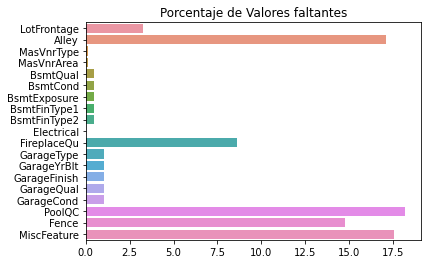

In [10]:
missings=df_train.isna().sum()
missings=missings[missings>0]/missings.shape[0]
sns.barplot(x=missings.values,y=missings.index).set_title("Porcentaje de Valores faltantes");
missings

In [11]:
# drop_cols=list(missings[missings>10].index)
# df_train.drop(drop_cols,axis=1,inplace=True)

In [12]:
# dtypes=df_train.drop(cf.TARGET,axis=1).dtypes
# objects_col=list(dtypes[dtypes=="object"].index)
# numeric_cols=list(dtypes[(dtypes=="float64")|(dtypes=="int64")].index)
# print("Variables Categoricas:", len(objects_col))
# print("Variables Numericas:", len(numeric_cols))

### Codificando las variables categoricas con LabelEncoder, para ver correlacion entre variables y el target
se crea el DataFrame, "df_encoded", para fines de exploracion, pero para el preprocesamiento final se usará OneHotEncoder y se descartará el DataFrame "df_encoded"

In [13]:
df_encoded=df_train.copy()
for col in objects_col:
    le=LabelEncoder()
    df_encoded[col]=le.fit_transform(df_train[col])

### Correlacion entre Features

optenemos la correlacion entre features

- el gráfico puede ser muy grande, sugiero abrirlo en una pestaña nueva para mejor visualizacion

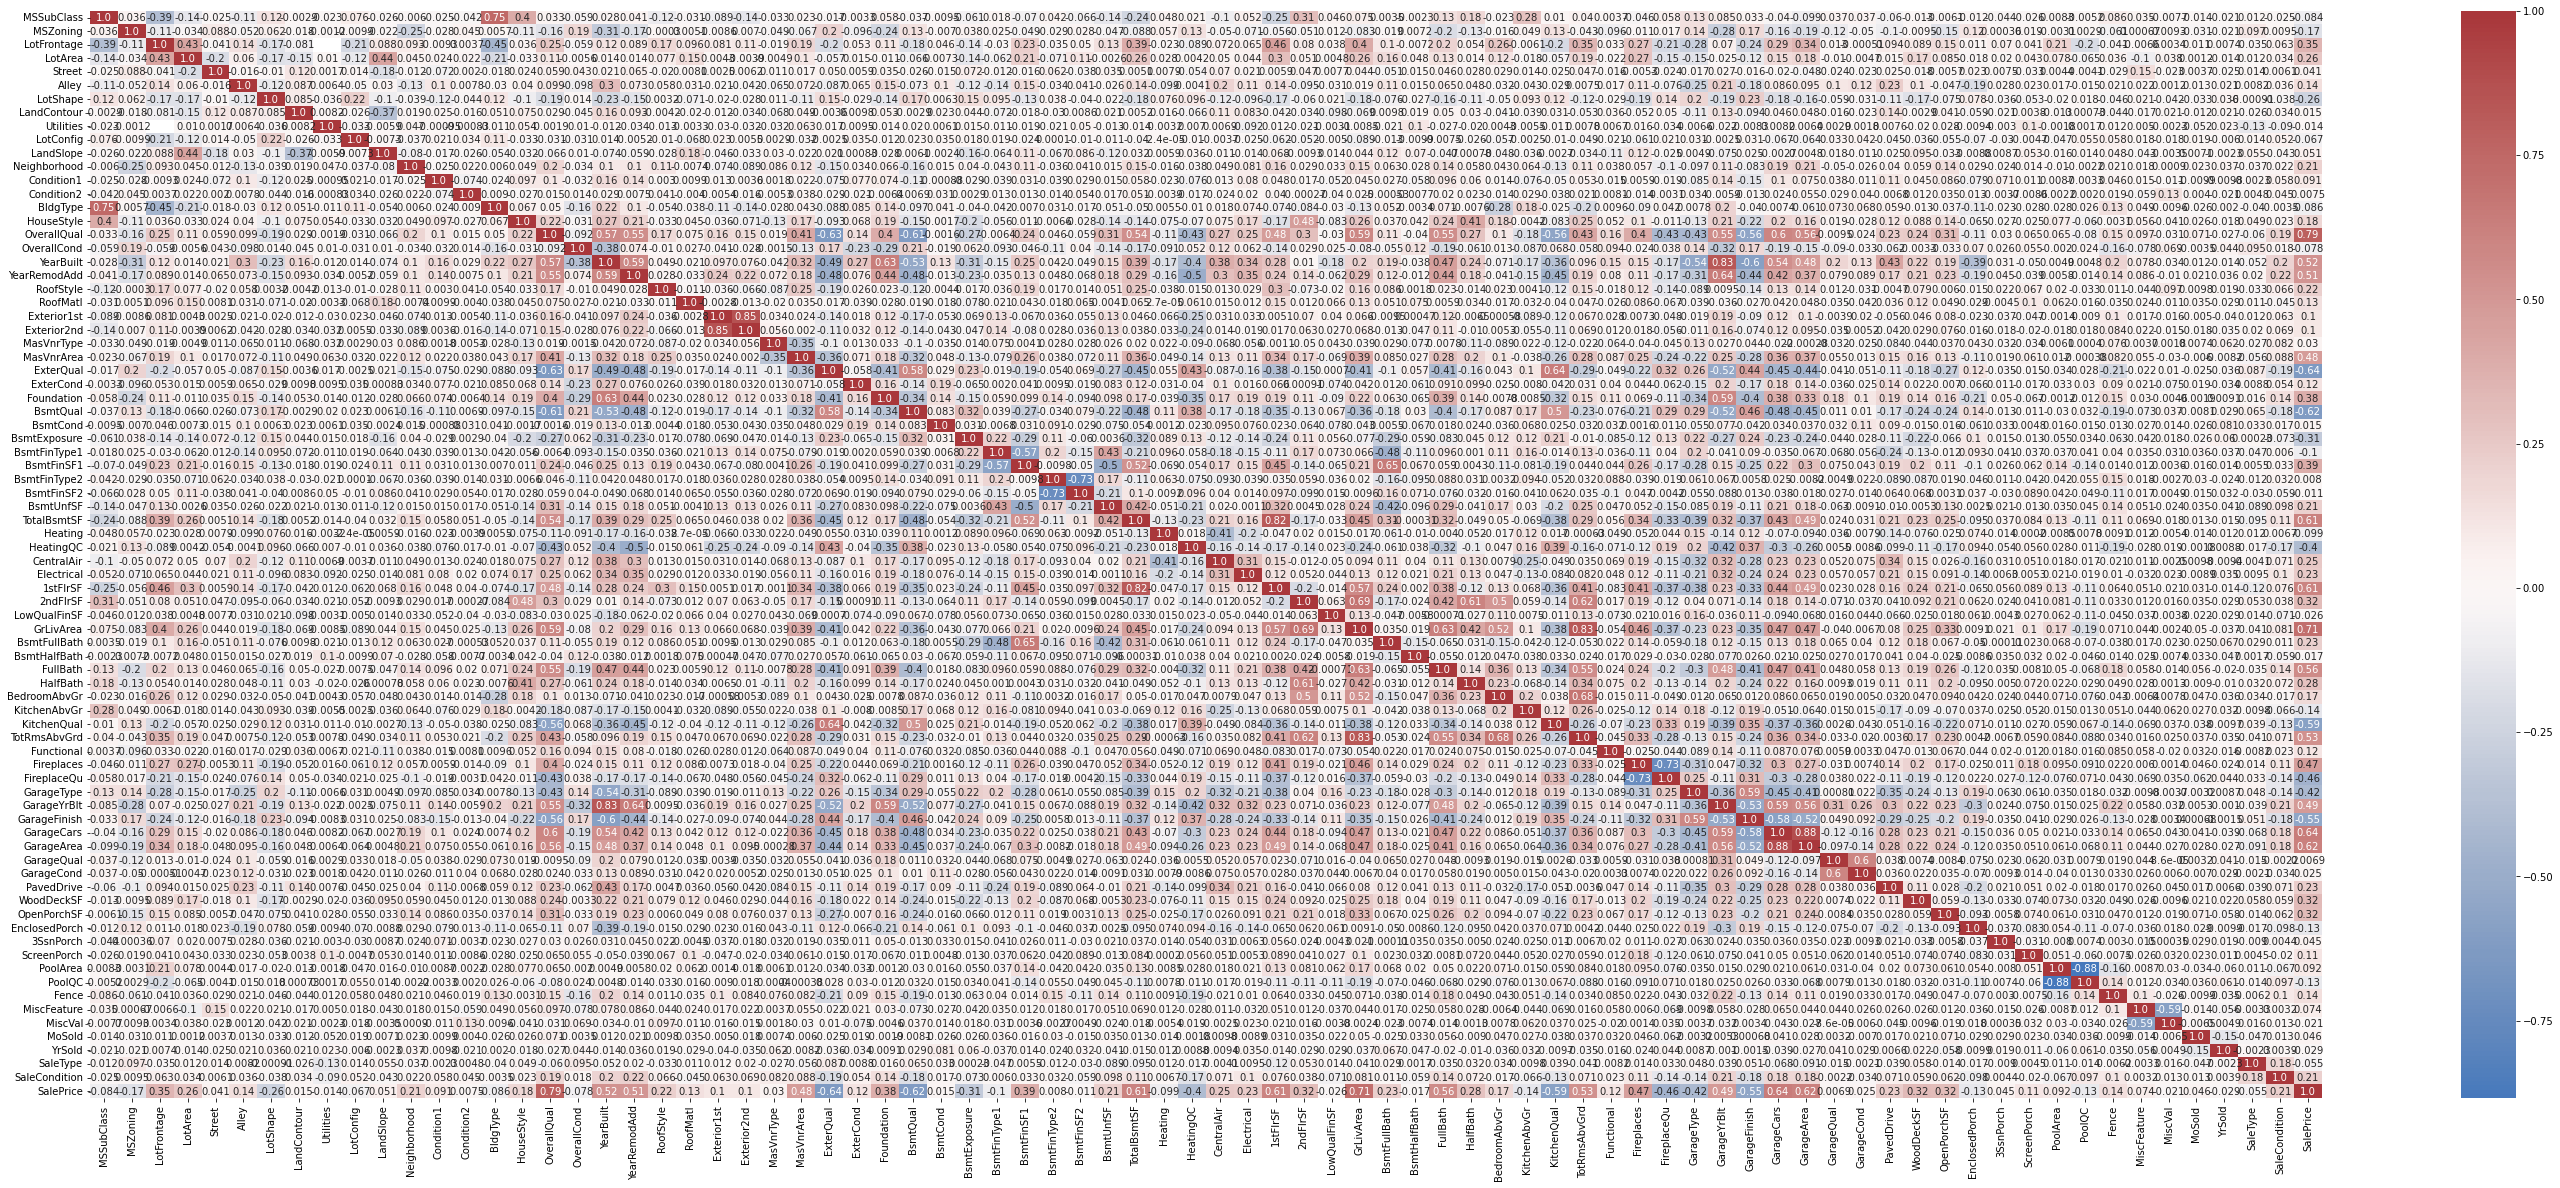

In [14]:
corr=df_encoded.corr()
plt.figure(figsize=(50,20))
sns.heatmap(corr,annot=True,cmap="vlag",fmt=".2",center=0);

### Correlacion de los Features con el Target

obtenmos la correlacion de cada feature con el target SalePrice

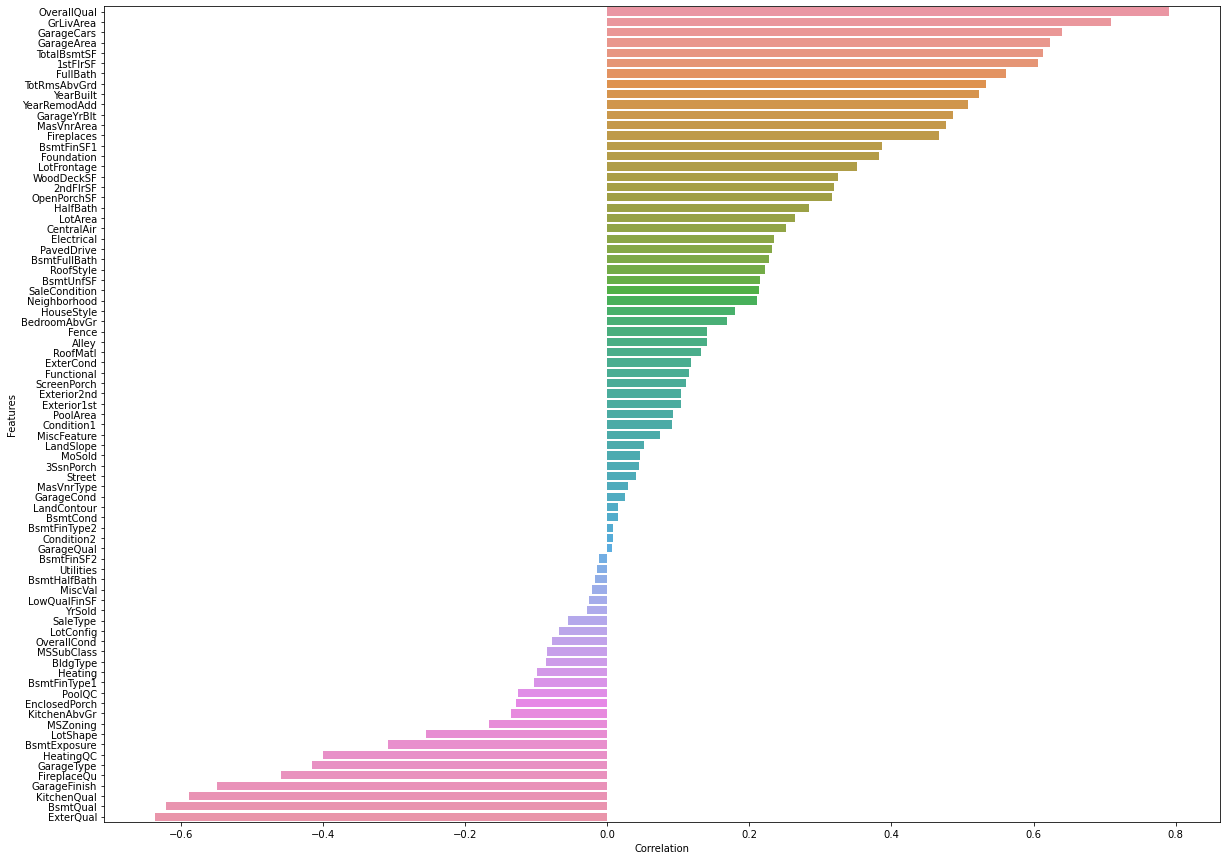

In [15]:
corr = df_encoded.drop(cf.TARGET,axis=1).corrwith(y).sort_values(ascending=False)
corr = pd.DataFrame({"Features":corr.index,"Correlation":corr.values})
plt.figure(figsize=(20,15))
sns.barplot(x=corr["Correlation"],y=corr["Features"]);


### Pairplot
- el gráfico es enorme, se calculó una sola vez y se guardó como "pairplot.pdf" 
- las lineas están comentadas por el bien de tu pc ;) 


In [16]:
# sns.pairplot(df_train[numeric_cols+[cf.TARGET]])

## Creando un Pipeline

Creamos un pipelines para los tipos de datos numericos y categoricos

Luego usamos ColumnTransformer para unir los pipelines y crear un solo preprocessor 

In [18]:
cols_fillna_NA=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PoolQC','Fence','MiscFeature']

la lista "cols_fillna_NA" son variables categoricas, en la Documentacion dada en "Housing Dreams/README.md", dice que los valores nulos de dichas variables categoricas, deben ser Reemplazados/Imputados por el string "NA"

In [42]:
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoding",OneHotEncoder(handle_unknown='ignore')),
])
numerical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler()),
    # ("log1p", lambda x: np.log1p(x))
])
# fillna_0=Pipeline(steps=[ # reemplaza los na por 0 
#     ("imputer",SimpleImputer(strategy="constant",fill_value=0)),
#     ("scaler",StandardScaler()),
# ])
fillna_NA=Pipeline(steps=[ # reemplaza los na por NA
    ("imputer",SimpleImputer(strategy="constant",fill_value="NA")),
    ("encoding",OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("fillna_NA", fillna_NA, cols_fillna_NA),
        ("num", numerical_transformer, numeric_cols),
        ("cat", categorical_transformer, list(set(objects_col)-set(cols_fillna_NA))),
    ],
)

X_clean=preprocessor.fit_transform(X)
y_clean=np.log1p(y)

#### IMPORTANTE !!!!!!!!!!!
- se usa "np.log1p(y)" para normalizar la columna "SalePrice"
- entonces para optener la predicción real, sin normalizar, se tiene que usar "np.expm1(y)" que es el proceso inverso de "np.log1p(y)"

Donde:
- np.log1p(y) = $ln(1 + y)$ 
- np.expm1(y) = $y^e - 1$ 


### Separamos el Dataset en train y val

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.3, random_state=40) 

Usamos el modelo CatBoostRegressor

In [21]:
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import cross_val_score

# regresor=DecisionTreeRegressor()
# regresor.fit(X_train,y_train);

# regresor=RandomForestRegressor()
# regresor.fit(X_train,y_train);

# regresor=GradientBoostingRegressor()
# regresor.fit(X_train,y_train);

# regresor=LassoCV()
# regresor.fit(X_train,y_train);

# estimators = [
#     ('GradientBoostingRegressor', GradientBoostingRegressor()),
#     ('CatBoostRegressor', CatBoostRegressor())
# ]
# regresor=StackingRegressor(
#     estimators=estimators,
#     final_estimator=RandomForestRegressor(n_estimators=10),
# )
# regresor.fit(X_train,y_train);

regresor = CatBoostRegressor()
regresor = regresor.fit(X_train, y_train, verbose = 0)


Hayamos el RMSLE (root mean squared log error) del modelo

In [30]:
msle=mean_squared_log_error(y_val, regresor.predict(X_val), squared=False) # RMSLE
print("RMSLE",np.round(msle,5))

RMSLE 0.00855


In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model = CatBoostRegressor()
# parameters = {
#     'depth' : [6,8,10,12,15,20],
#     'learning_rate' : [ 0.05, 0.1],
#     'iterations'    : [30, 50, 100]
# }

# model = GradientBoostingRegressor()
# parameters = {
#     'n_estimators' : [300,400,600],
#     'max_depth'    : [3,7,15]
# }

# grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1,verbose=1)
# grid.fit(X_train, y_train)

In [24]:
# regresor=grid.best_estimator_
# grid.best_params_
# # {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
# # {'max_depth': 3, 'n_estimators': 400}


### Cross-validation

In [25]:
cv=cross_val_score(regresor, X_val, y_val, cv=5,scoring=make_scorer(mean_squared_log_error, squared=False));
print("cross_val_score:",cv.mean())


Learning rate set to 0.034685
0:	learn: 0.3699831	total: 6.18ms	remaining: 6.17s
1:	learn: 0.3618319	total: 10.2ms	remaining: 5.1s
2:	learn: 0.3555428	total: 14.1ms	remaining: 4.68s
3:	learn: 0.3497243	total: 17.4ms	remaining: 4.33s
4:	learn: 0.3442600	total: 21.6ms	remaining: 4.3s
5:	learn: 0.3382988	total: 25.2ms	remaining: 4.17s
6:	learn: 0.3316129	total: 28.3ms	remaining: 4.01s
7:	learn: 0.3260577	total: 31.1ms	remaining: 3.85s
8:	learn: 0.3203877	total: 35.8ms	remaining: 3.94s
9:	learn: 0.3147747	total: 39.6ms	remaining: 3.92s
10:	learn: 0.3089182	total: 43.5ms	remaining: 3.91s
11:	learn: 0.3040474	total: 47ms	remaining: 3.87s
12:	learn: 0.2986852	total: 51.3ms	remaining: 3.89s
13:	learn: 0.2937033	total: 54.1ms	remaining: 3.81s
14:	learn: 0.2892931	total: 57.4ms	remaining: 3.77s
15:	learn: 0.2839109	total: 60.4ms	remaining: 3.72s
16:	learn: 0.2790835	total: 63.7ms	remaining: 3.69s
17:	learn: 0.2751274	total: 69.6ms	remaining: 3.8s
18:	learn: 0.2710026	total: 73.8ms	remaining: 3.8

### Predecimos DataSet de test

Leemos el Dataset de Test y hacemos las predicciones

In [26]:
df_test=pd.read_csv(cf.TEST_FILE,index_col="Id")

X_test=preprocessor.transform(df_test)
y_pred=regresor.predict(X_test)
y_pred=np.expm1(y_pred)

submission=pd.DataFrame({cf.TARGET:y_pred},index=df_test.index)
submission.to_csv(cf.INPUT_DIR+"submission.csv")
submission.rename(columns={cf.TARGET:"pred"}).to_csv(cf.SUBMISSION_FILE,index=False)